In [4]:
import numpy
from PIL import Image
import io
import requests
import json
import time

In [3]:
#Init the needed functions for images
def create_and_save_image(width = 64, height = 64 , name = 'random.png'):
    imarray = numpy.random.rand(width,height,3) * 255
    im = Image.fromarray(imarray.astype('uint8')).convert('RGBA')
    im.save(name)

def create_and_save_n_images(width=64 , height = 64, num = 100):
    for n in range(num):
        create_image(width, height, ('random'+str(n+1)+'.png'))
        
def create_bytearray(width=64,height=64):
    imarray = numpy.random.rand(width,height,3)*255
    casted = imarray.astype('uint8')
    return casted

def create_img_from_bytearray(bytearr, colorscheme='RGBA'):
    im=Image.fromarray(bytearr).convert(colorscheme)
    return im

def img_to_bytearray(Image):
    imgByteArr = io.BytesIO()
    Image.save(imgByteArr, format='PNG')
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr

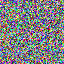

In [5]:
#check
img = create_img_from_bytearray(create_bytearray())
img
#img_to_bytearray(img)

In [6]:
#load trasi infos
url = 'https://phinau.de/trasi'
access_key = 'ehiefoveingereim3ooD2vo8reeb9ooz'
credentials = {'key': access_key}

In [14]:
def send_img_bytearray(nipples):
    file_to_upload = {'image': nipples}
    post_request = requests.post(url, files=file_to_upload, data=credentials)
    return post_request

In [13]:
#check
img = create_img_from_bytearray(create_bytearray())
imgNipples = img_to_bytearray(img)
send_img_bytearray(imgNipples).status_code

200

In [17]:
def get_best_score(ResponseText):
    scores = json.loads(ResponseText)
    return scores[1].get('confidence')

def save_results(bestScore,imgBytes):
    #to be done, only mockup
    print(str(bestScore))

def full_loop():
    img_bytes = img_to_bytearray(create_img_from_bytearray(create_bytearray()))
    response = send_img_bytearray(img_bytes)
    if(response.status_code==200):
        save_results(get_best_score(response.text),img_bytes)
    else:
        #throw errors? Show me something?
        print('upsie')

In [18]:
#check
full_loop()

0.04097262


In [19]:
def execute_timed_full_loops(MaxLoops,Intervall):
    i=0
    while(i < MaxLoops):
        full_loop()
        time.sleep(Intervall)
        i+=1;

In [20]:
execute_timed_full_loops(100, 1.2)

0.05160997
0.06992843
0.03571644
0.03853389
0.05305329
0.06525174
0.04928315
0.03376892
0.02569007
0.04251461


KeyboardInterrupt: 